In [150]:
%matplotlib inline
import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

def read_data_from_h5(filename):
    import h5py

    data_dict = {}

    with h5py.File(filename, "r") as f:
        data = {}
        keys = f.keys()
        

        for key in keys:
            
            r_dict  = f[key]
            
            for k, v in r_dict.items():
                if k not in data_dict:
                    data_dict[k] = []
                data_dict[k].append((float(key), float(v[()])))

    for k, v in data_dict.items():
        data_dict[k] = numpy.array(v)

    return data_dict

params = {
        "font.size":       20,
        "axes.titlesize":  16,
        "axes.labelsize":  24,
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "figure.subplot.wspace":0.0,
        "figure.subplot.hspace":0.0,
        "axes.spines.right": True,
        "axes.spines.top":   True,
        "xtick.direction":'in',
        "ytick.direction":'in',
        "text.usetex": True,
        "font.family": "serif",
        'text.latex.preamble': r"\usepackage{amsmath}"
}

# colors = ["#f08700", "#c6382b", "#9e566b", "#39447a", "#621b12",  "#00a6a6",]
colors = ["#016b7e", "#099da0", "#9cd8c7", "#ecdcae", "#f1a502", "#d17203", "#c44703", "#b82513", "#a6272d"]

mpl.rcParams.update(params)

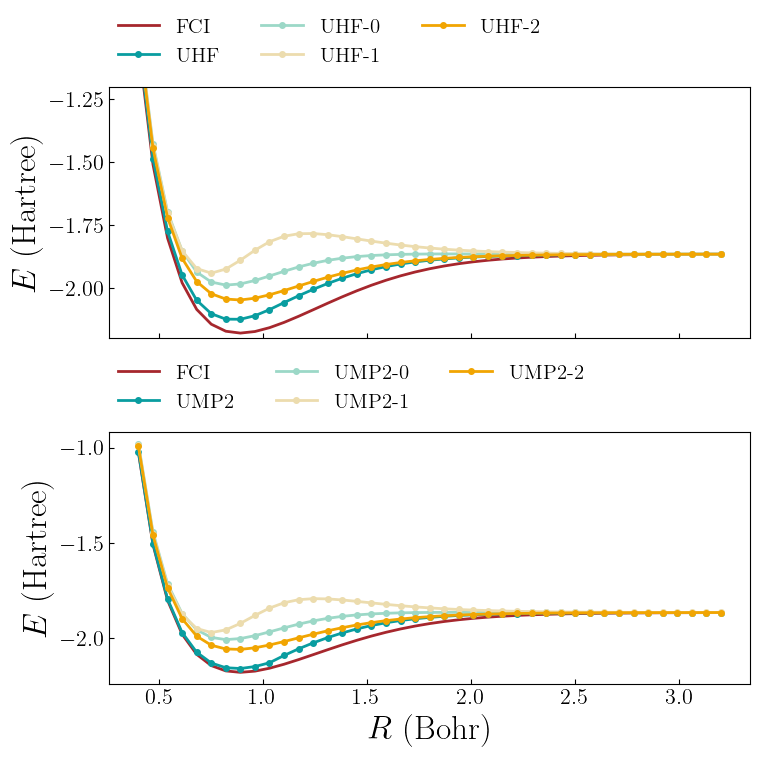

In [151]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
data_dict = read_data_from_h5("./data/h4/bs-uhf-sto3g.h5")


label_list = []
label_list.append("FCI")
# label_list.append("RHF")
# label_list.append("MP2")
label_list.append("UHF")
label_list.append("UHF-0")
label_list.append("UHF-1")
label_list.append("UHF-2")

style_dict = {}
for i, label in enumerate(label_list):
    if label == "FCI":
        style_dict[label] = {
            "color": colors[-1],
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

    else:
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

ax = axs[0]
for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
ax.set_ylim(-2.2, -1.20)

ax = axs[1]
label_list = []
label_list.append("FCI")
# label_list.append("RHF")
# label_list.append("MP2")
label_list.append("UMP2")
label_list.append("UMP2-0")
label_list.append("UMP2-1")
label_list.append("UMP2-2")

style_dict = {}
for i, label in enumerate(label_list):
    if label == "FCI":
        style_dict[label] = {
            "color": colors[-1],
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

    else:
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
ax.set_xlabel(r"$R$ (Bohr)")

fig.tight_layout(w_pad=0.1, h_pad=0.1)

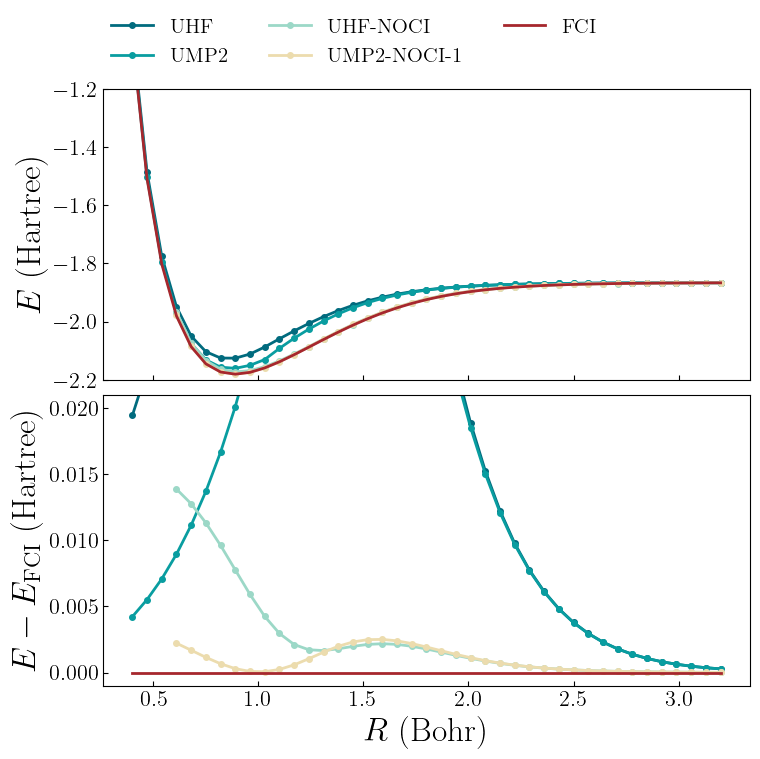

In [152]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
data_dict = read_data_from_h5("./data/h4/bs-uhf-sto3g.h5")


label_list = []

# label_list.append("RHF")
# label_list.append("MP2")
label_list.append("UHF")
label_list.append("UMP2")
label_list.append("UHF-NOCI")
label_list.append("UMP2-NOCI-1")
label_list.append("FCI")
# label_list.append("UMP2-NOCI-2")

style_dict = {}
for i, label in enumerate(label_list):
    if label == "FCI":
        style_dict[label] = {
            "color": colors[-1],
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

    else:
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

ax = axs[0]
for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
ax.set_ylim(-2.2, -1.20)

ax = axs[1]

for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] - data_dict["FCI"][:,1],
        **style_dict[label])

ax.set_ylim(-0.001, 0.021)

ax.set_ylabel(r"$E - E_{\mathrm{FCI}}$ (Hartree)")
ax.set_xlabel(r"$R$ (Bohr)")

fig.tight_layout(w_pad=0.1, h_pad=0.1)

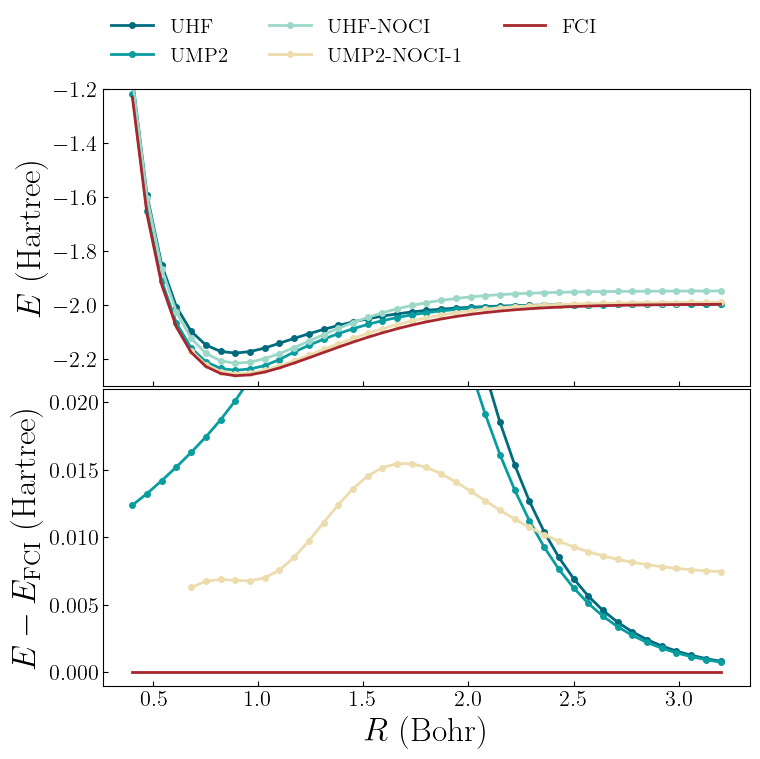

In [156]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
data_dict = read_data_from_h5("./data/h4/bs-uhf-cc-pvdz.h5")


label_list = []

# label_list.append("RHF")
# label_list.append("MP2")
label_list.append("UHF")
label_list.append("UMP2")
label_list.append("UHF-NOCI")
label_list.append("UMP2-NOCI-1")
label_list.append("FCI")

style_dict = {}
for i, label in enumerate(label_list):
    if label == "FCI":
        style_dict[label] = {
            "color": colors[-1],
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

    else:
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

ax = axs[0]
for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
ax.set_ylim(-2.3, -1.20)

ax = axs[1]

for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] - data_dict["FCI"][:,1],
        **style_dict[label])

ax.set_ylim(-0.001, 0.021)

ax.set_ylabel(r"$E - E_{\mathrm{FCI}}$ (Hartree)")
ax.set_xlabel(r"$R$ (Bohr)")

fig.tight_layout(w_pad=0.1, h_pad=0.1)

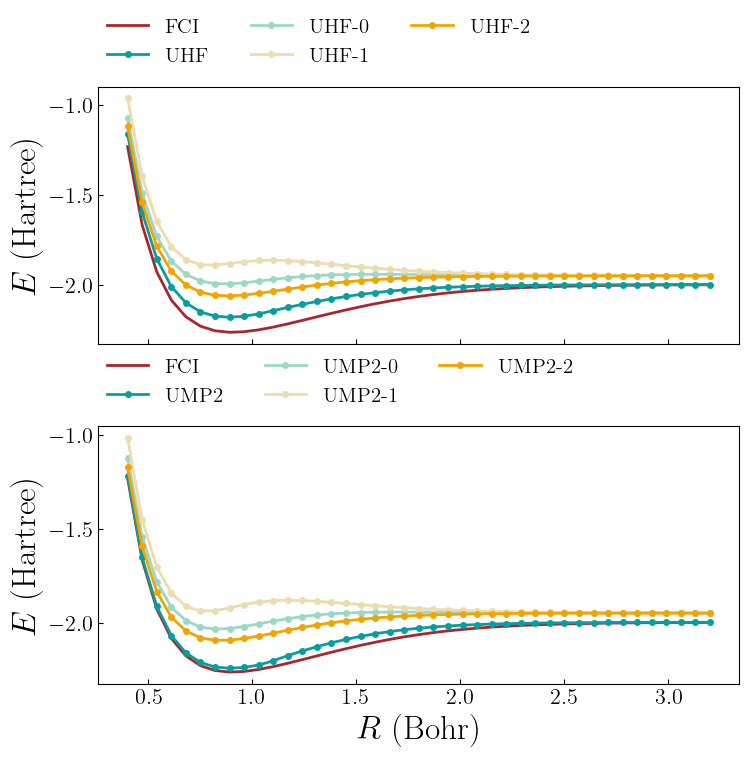

In [155]:
fig, axs = plt.subplots(2, 1, figsize=(8,8), sharex=True)
data_dict = read_data_from_h5("./data/h4/bs-uhf-cc-pvdz.h5")


label_list = []
label_list.append("FCI")
# label_list.append("RHF")
# label_list.append("MP2")
label_list.append("UHF")
label_list.append("UHF-0")
label_list.append("UHF-1")
label_list.append("UHF-2")

style_dict = {}
for i, label in enumerate(label_list):
    if label == "FCI":
        style_dict[label] = {
            "color": colors[-1],
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

    else:
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

ax = axs[0]
for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
# ax.set_ylim(-2.2, -1.20)

ax = axs[1]
label_list = []
label_list.append("FCI")
# label_list.append("RHF")
# label_list.append("MP2")
label_list.append("UMP2")
label_list.append("UMP2-0")
label_list.append("UMP2-1")
label_list.append("UMP2-2")
# label_list.append("UCISD-0")
# label_list.append("UCISD-1")
# label_list.append("UCISD-2")

style_dict = {}
for i, label in enumerate(label_list):
    if label == "FCI":
        style_dict[label] = {
            "color": colors[-1],
            "marker": "None",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

    else:
        style_dict[label] = {
            "color": colors[i % len(colors)],
            "marker": "o",
            "linestyle": "-",
            "linewidth": 2.0,
            "markersize": 4.0,
            "label": label,
        }

for i, label in enumerate(label_list):
    ax.plot(
        data_dict[label][:,0], 
        data_dict[label][:,1] + data_dict["ene_nuc"][:,1],
        **style_dict[label])

ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
          edgecolor='silver', frameon=False, fontsize=15, ncol=3)

ax.set_ylabel(r"$E$ (Hartree)")
ax.set_xlabel(r"$R$ (Bohr)")

fig.tight_layout(w_pad=0.1, h_pad=0.1)